In [1]:
# Import depedencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced


# Read the CSV and Perform Basic Data Cleaning

In [2]:
#Load data
file_path = Path('../Final_Project_Resources/final.csv')
df = pd.read_csv (file_path)
df.head()

# # Drop null rows
# df =df.dropna()



,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean


# Using Linear Regression Model

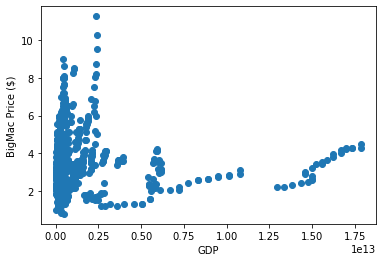

In [3]:
# Ploting the data as a scatter plot
plt.scatter(df.GDP, df.dollar_price)
plt.xlabel('GDP')
plt.ylabel('BigMac Price ($)')
plt.show()


In [4]:
# Define independent variable
X =df.GDP.values.reshape(-1,1)

In [5]:
# Define dependent variable
y= df.dollar_price

In [6]:
scaler = MinMaxScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [8]:
# Instantiate linear regression model
model = LinearRegression()


In [9]:
# training the model
model.fit(X,y)

LinearRegression()

In [10]:
y_pred = model.predict(X)

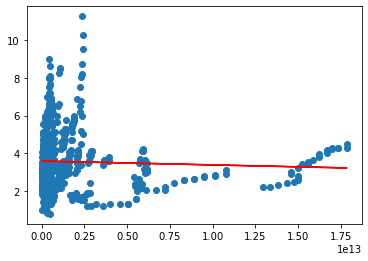

In [11]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [12]:
print(model.coef_)
print(model.intercept_)

[-2.0387791e-14]
3.5949872401917418


In [13]:
print(model.score(X,y))

0.001463875238819301


# Using 2nd Polynomial

In [14]:
# Import dependencies
from sklearn.preprocessing import PolynomialFeatures

# Save an instance of Polynomial Feature
poly = PolynomialFeatures(degree=3, include_bias=True)

In [15]:
# poly_features = poly.fit_transform(X.reshape(-1,1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [17]:
poly_reg_model = LinearRegression()

In [18]:
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_predicted = poly_reg_model.predict(X_test)
y_predicted

array([3.59481641, 3.59263039, 3.44302251, 3.58980617, 3.59456628,
       3.57532161, 3.59184225, 3.59128964, 3.59737746, 3.58512095,
       3.58932407, 3.59215906, 3.59026285, 3.59560396, 3.43771641,
       3.59142489, 3.58698171, 3.58985946, 3.59000781, 3.59991429,
       3.58895988, 3.59469086, 3.59474403, 3.59637091, 3.53710671,
       3.59659312, 3.58926396, 3.59664677, 3.59542903, 3.59552684,
       3.45586566, 3.58963278, 3.59224577, 3.50292852, 3.54276434,
       3.59613594, 3.45668871, 3.58741764, 3.59555136, 3.5894539 ,
       3.58489087, 3.54509455, 3.57618985, 3.58437629, 3.44551457,
       3.59998932, 3.58961832, 3.59672193, 3.59491859, 3.43899338,
       3.59469178, 3.56637159, 3.59759754, 3.54677689, 3.59979735,
       3.58966745, 3.59197562, 3.58312416, 3.59308107, 3.59679808,
       3.58813366, 3.59438345, 3.59474715, 3.59262203, 3.59293372,
       3.36641988, 3.59432293, 3.49510279, 3.59431822, 3.53710671,
       3.59880136, 3.58489087, 3.59357461, 3.57862181, 3.55400

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
poly_reg_rmse = np.sqrt(mean_squared_error(y_test,
                                          y_predicted))
poly_reg_rmse

1.4885154627642792

ValueError: x and y must have same first dimension, but have shapes (920, 1) and (184,)

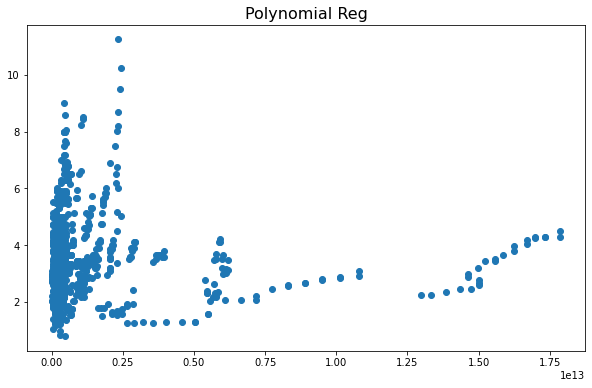

In [22]:
plt.figure(figsize= (10,6))
plt.title("Polynomial Reg", size=16)
plt.scatter(X, y)
plt.plot(X, y_predicted, c='red')
plt.show()